## On the H-to-He ratio

### Solution for nuclei with spallation losses

The convection-diffusion equation for nuclei with spallation in the ISM:

$$-\frac{\partial}{\partial z} \left[ D \frac{\partial f}{\partial z} \right] + \frac{f}{\tau_{\rm sp}} = Q_0 \delta(z)$$

where the spallation time scale is given by

$$\tau_{\rm sp} = \frac{1}{n_{\rm ISM} \sigma_{\rm sp} v}$$

Here we approximate the gas density as $n_{\rm ISM} \sim 2 h n_d \delta(z)$, i.e we assume that the spallation process only occurs in the disk.


In [1]:
def grammage(R):
    """compute grammage as a function of rigidity"""
    chi_0 = 10.
    R_0 = 4.
    delta = 0.34
    return chi_0 * (R / R_0)**(-delta) 

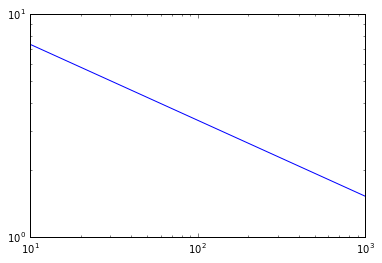

In [7]:
import matplotlib.pyplot as plt
import numpy as np
R = np.logspace(1, 3, 100)
plt.plot(R, grammage(R))
plt.xscale('log'), plt.yscale('log')
plt.show()